<a href="https://colab.research.google.com/github/Elham-Esmaeelnia/mlp-tensorflow_regression/blob/main/regression_by_mlp_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [4]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [5]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
keras.layers.Dense(1)
])

In [6]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [8]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.7590 - val_loss: 0.5705
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8165 - val_loss: 0.5297
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4880 - val_loss: 0.4847
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4661 - val_loss: 0.4695
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4513 - val_loss: 0.4562
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4449 - val_loss: 0.4502
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4416
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4568
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4315 - val_loss: 0.4334
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4183 - val_loss: 0.4286

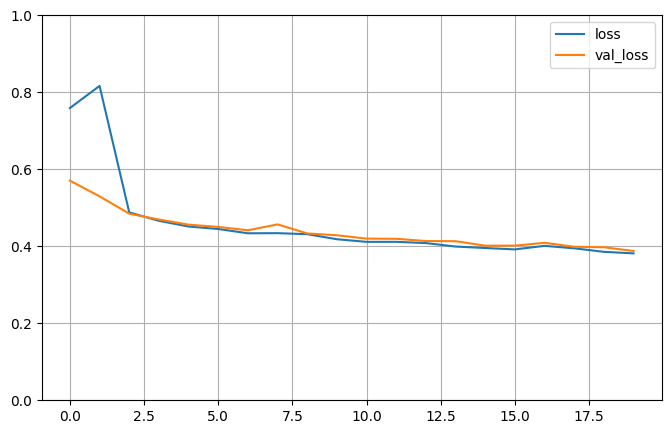

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [10]:
se_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3978
